<a href="https://colab.research.google.com/github/Ahella-Bassem-Mohammed/Stroke_Pre-Detection_Analysis/blob/main/Stroke_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
# Enable iterative imputer before importing it
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer


from category_encoders.target_encoder import TargetEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.DataFrame(pd.read_csv('full-stroke-data.csv'))
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [5]:
df[df["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [6]:
df= df[df['gender'].isin(['Male', 'Female'])]

In [7]:
df.iloc[3114:3118,:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,67032,Male,42.0,0,0,No,Govt_job,Urban,115.21,28.7,Unknown,0
3115,39784,Female,72.0,0,0,Yes,Self-employed,Urban,65.12,28.3,never smoked,0
3117,15230,Female,9.0,0,0,No,children,Rural,80.55,15.1,Unknown,0
3118,25218,Female,31.0,0,0,Yes,Govt_job,Urban,88.20,22.7,never smoked,0


In [8]:
index=[i for i in range(df.shape[0])]
df.index=index
df.iloc[3114:3118,:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,67032,Male,42.0,0,0,No,Govt_job,Urban,115.21,28.7,Unknown,0
3115,39784,Female,72.0,0,0,Yes,Self-employed,Urban,65.12,28.3,never smoked,0
3116,15230,Female,9.0,0,0,No,children,Rural,80.55,15.1,Unknown,0
3117,25218,Female,31.0,0,0,Yes,Govt_job,Urban,88.20,22.7,never smoked,0


In [9]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


In [10]:
df[["ever_married","Residence_type","gender"]]=pd.get_dummies(df[["ever_married","Residence_type","gender"]],drop_first=True).astype(int)
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [11]:
#work_type_mapping = {
    #'Private': 0,
    #'Self-employed': 1,
   # 'Govt_job': 2,
  #  'children': 3,
 #   'Never_worked': 4
#}
#df['work_type'] = df['work_type'].map(work_type_mapping)

enc=TargetEncoder()
to_encode="work_type"
enc.fit(X=df[to_encode],y=df["stroke"])
encoded = enc.transform(df[to_encode])

In [12]:
df["work_type"] = encoded["work_type"]

In [13]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [14]:
df['work_type'].value_counts()

,count
work_type,
0.050958,2924
0.079365,819
0.002911,687
0.050228,657
0.021940,22


In [15]:
children_rows = df[df['work_type'] == 'children']

children_above_18 = children_rows[children_rows['age'] >= 18]

print(f"Rows where work_type is 'children' and age is 18 or above:")
print(children_above_18)

Rows where work_type is 'children' and age is 18 or above:
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [17]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,884
smokes,789


In [18]:
unknown_percentage = (df['smoking_status'].value_counts()['Unknown'] / len(df)) * 100
print(f"Percentage of 'Unknown' in smoking_status: {unknown_percentage:.2f}%")

Percentage of 'Unknown' in smoking_status: 30.22%


In [19]:
missing_percentage = df['bmi'].isnull().sum() / len(df) * 100
print(f"Percentage of missing values in 'bmi': {missing_percentage:.2f}%")

Percentage of missing values in 'bmi': 3.93%


In [20]:
smoking_mapper={"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":np.nan}
for i in range(df.shape[0]):
    status=df.loc[i,"smoking_status"] # Use .loc for safer indexing
    if pd.notna(status): # Check if 'status' is not NaN before mapping
        df.loc[i,"smoking_status"]=smoking_mapper.get(status,status) # Use get to handle missing keys, keep orginal value
# or df.loc[i,"smoking_status"]=smoking_mapper[status]
df["smoking_status"].unique()

array([1, 0, 2, nan], dtype=object)

In [22]:

# Define the estimator
estimator = RandomForestRegressor(max_depth=8, random_state=11)

# Create IterativeImputer with the estimator
mice = IterativeImputer(estimator=estimator, random_state=11, skip_complete=True)

# Ensure `df` exists and contains only numerical data
if not isinstance(df, pd.DataFrame):
    raise TypeError("df must be a Pandas DataFrame")

# Apply imputation
df2_array = mice.fit_transform(df)  # Returns a NumPy array

# Convert NumPy array back to DataFrame with proper columns and index
df = pd.DataFrame(df2_array, columns=df.columns, index=df.index)

# Display first 5 rows
df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,1.0,67.0,0.0,1.0,1.0,0.050958,1.0,228.69,36.600000,1.0,1.0
1,51676.0,0.0,61.0,0.0,0.0,1.0,0.079365,0.0,202.21,35.603455,0.0,1.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,0.050958,0.0,105.92,32.500000,0.0,1.0
3,60182.0,0.0,49.0,0.0,0.0,1.0,0.050958,1.0,171.23,34.400000,2.0,1.0
4,1665.0,0.0,79.0,1.0,0.0,1.0,0.079365,0.0,174.12,24.000000,0.0,1.0


In [23]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [24]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,1.0,67.0,0.0,1.0,1.0,0.050958,1.0,228.69,36.600000,1.000000,1.0
1,51676.0,0.0,61.0,0.0,0.0,1.0,0.079365,0.0,202.21,35.603455,0.000000,1.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,0.050958,0.0,105.92,32.500000,0.000000,1.0
3,60182.0,0.0,49.0,0.0,0.0,1.0,0.050958,1.0,171.23,34.400000,2.000000,1.0
4,1665.0,0.0,79.0,1.0,0.0,1.0,0.079365,0.0,174.12,24.000000,0.000000,1.0
5,56669.0,1.0,81.0,0.0,0.0,1.0,0.050958,1.0,186.21,29.000000,1.000000,1.0
6,53882.0,1.0,74.0,1.0,1.0,1.0,0.050958,0.0,70.09,27.400000,0.000000,1.0
7,10434.0,0.0,69.0,0.0,0.0,0.0,0.050958,1.0,94.39,22.800000,0.000000,1.0
8,27419.0,0.0,59.0,0.0,0.0,1.0,0.050958,0.0,76.15,30.248953,0.755640,1.0
9,60491.0,0.0,78.0,0.0,0.0,1.0,0.050958,1.0,58.57,24.200000,0.658418,1.0


In [25]:
for i in range(df.shape[0]):
    if df.loc[i,"smoking_status"]<0.5:
        df.loc[i,"smoking_status"]=0
    elif df.loc[i,"smoking_status"] <1.5:
        df.loc[i,"smoking_status"]=1
    else:
        df.loc[i,"smoking_status"]=2

In [26]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,1.0,67.0,0.0,1.0,1.0,0.050958,1.0,228.69,36.600000,1.0,1.0
1,51676.0,0.0,61.0,0.0,0.0,1.0,0.079365,0.0,202.21,35.603455,0.0,1.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,0.050958,0.0,105.92,32.500000,0.0,1.0
3,60182.0,0.0,49.0,0.0,0.0,1.0,0.050958,1.0,171.23,34.400000,2.0,1.0
4,1665.0,0.0,79.0,1.0,0.0,1.0,0.079365,0.0,174.12,24.000000,0.0,1.0


MEMBER 2

In [27]:
print("Dataset Shape:", df.shape)
print("Number of Columns:", len(df.columns))

Dataset Shape: (5109, 12)
Number of Columns: 12


In [28]:
print("Dataset Description:")
print(df.describe())

Dataset Description:
                 id       gender          age  hypertension  heart_disease  \
count   5109.000000  5109.000000  5109.000000   5109.000000    5109.000000   
mean   36513.985516     0.413975    43.229986      0.097475       0.054022   
std    21162.008804     0.492592    22.613575      0.296633       0.226084   
min       67.000000     0.000000     0.080000      0.000000       0.000000   
25%    17740.000000     0.000000    25.000000      0.000000       0.000000   
50%    36922.000000     0.000000    45.000000      0.000000       0.000000   
75%    54643.000000     1.000000    61.000000      0.000000       0.000000   
max    72940.000000     1.000000    82.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   5109.000000  5109.000000     5109.000000        5109.000000   
mean       0.656293     0.048832        0.508123         106.140399   
std        0.474991     0.020953        0.499983          45.28

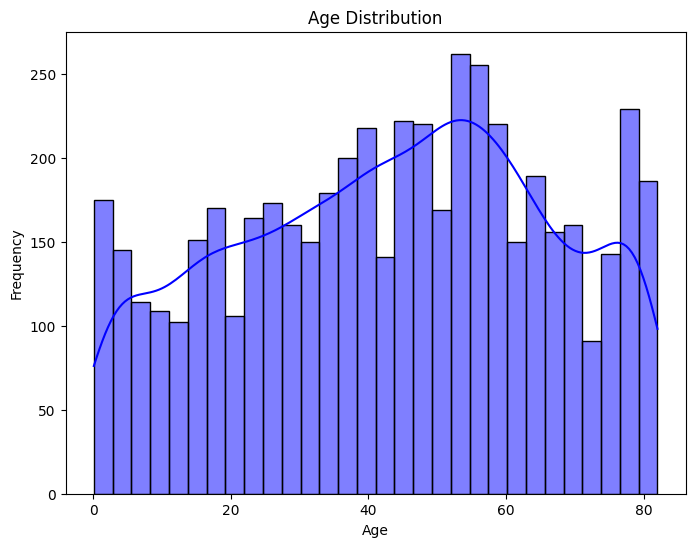

In [29]:
# Step 2: Analyzing distributions for each column
# Histogram: Distribution of numerical values (age, avg_glucose_level, bmi)
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

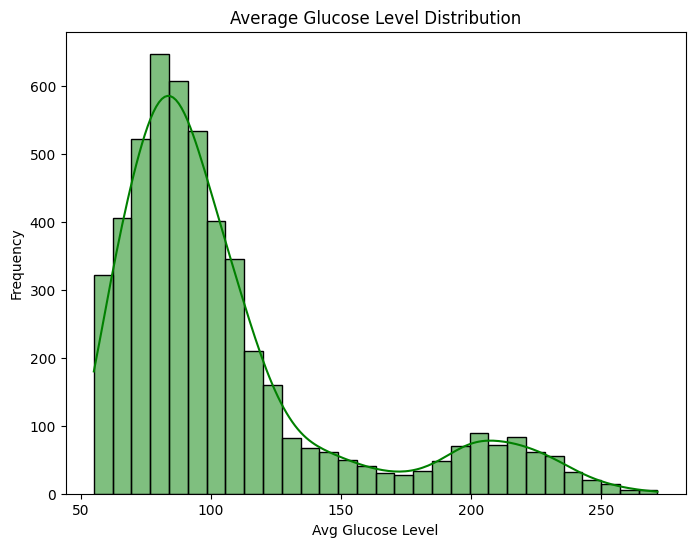

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30, color='green')
plt.title("Average Glucose Level Distribution")
plt.xlabel("Avg Glucose Level")
plt.ylabel("Frequency")
plt.show()

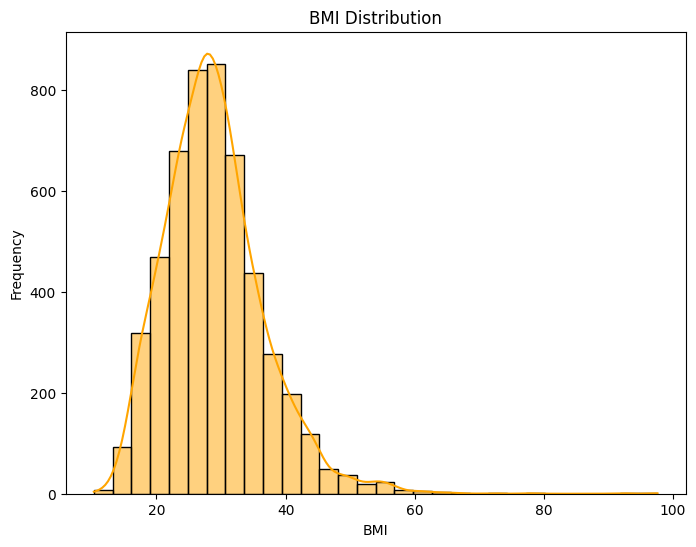

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=30, color='orange')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

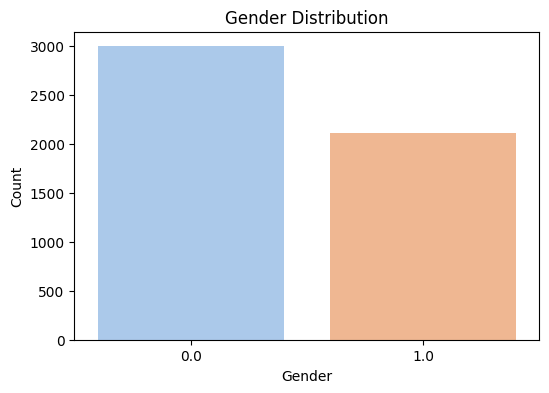

In [32]:
# Bar plot: Categorical columns (gender, marital status, smoking status)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

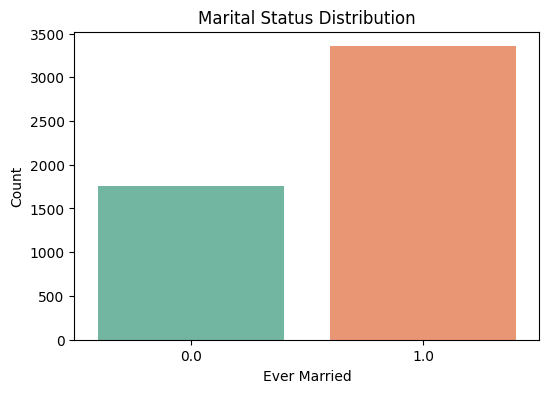

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ever_married', data=df, palette='Set2')
plt.title("Marital Status Distribution")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.show()

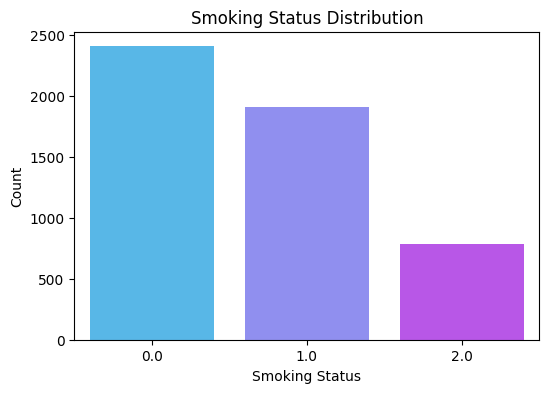

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking_status', data=df, palette='cool')
plt.title("Smoking Status Distribution")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.show()

In [35]:
# Step 3: Correlation Analysis
# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         id    gender       age  hypertension  heart_disease  \
id                 1.000000  0.001929  0.003677      0.003610      -0.001253   
gender             0.001929  1.000000 -0.027752      0.021223       0.085685   
age                0.003677 -0.027752  1.000000      0.276367       0.263777   
hypertension       0.003610  0.021223  0.276367      1.000000       0.108292   
heart_disease     -0.001253  0.085685  0.263777      0.108292       1.000000   
ever_married       0.013944 -0.030171  0.679084      0.164187       0.114601   
work_type          0.000465 -0.083610  0.665023      0.160511       0.116266   
Residence_type    -0.001219 -0.006105  0.014031     -0.007980       0.003045   
avg_glucose_level  0.000943  0.054722  0.238323      0.174540       0.161907   
bmi               -0.000734 -0.023939  0.333357      0.171282       0.043661   
smoking_status     0.004098  0.063501  0.127386      0.009756       0.063805   
stroke             0

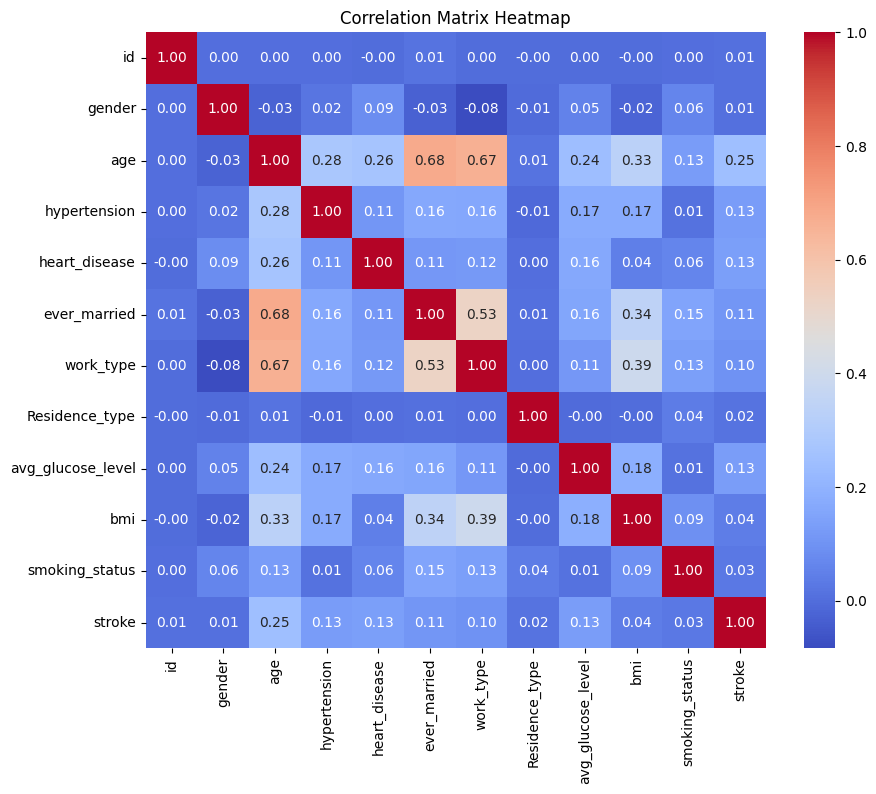

In [36]:
# Heatmap: Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

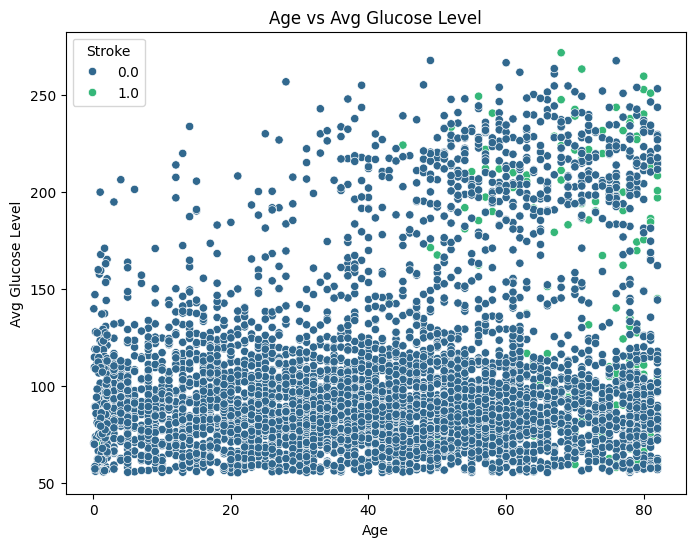

In [37]:
# Step 4: Exploring bivariate relationships
# Scatter plot: Age vs Avg Glucose Level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df, palette='viridis')
plt.title("Age vs Avg Glucose Level")
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")
plt.legend(title="Stroke")
plt.show()

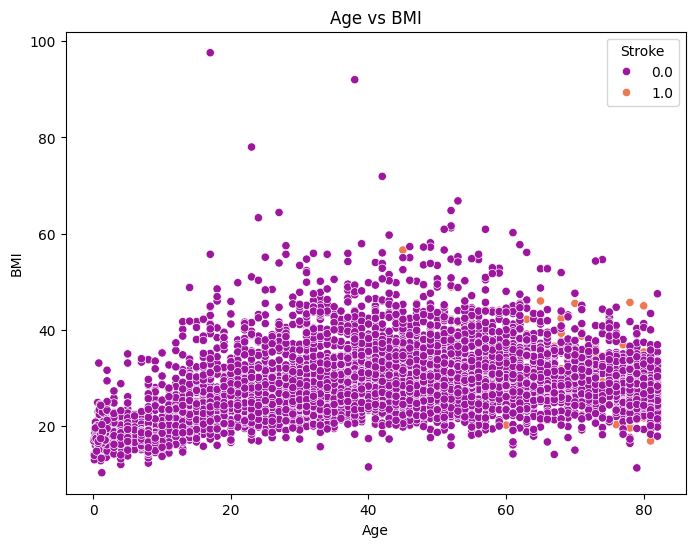

In [38]:
# Scatter plot: Age vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', hue='stroke', data=df, palette='plasma')
plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Stroke")
plt.show()

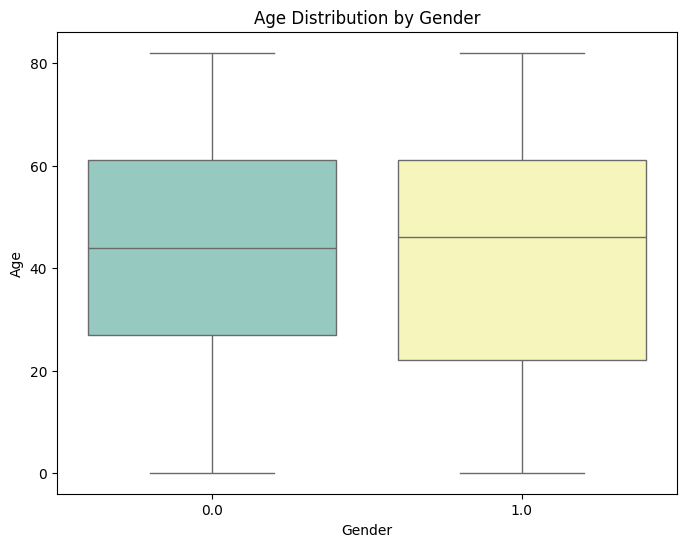

In [39]:
# Box plot: Distribution of Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df, palette='Set3')
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

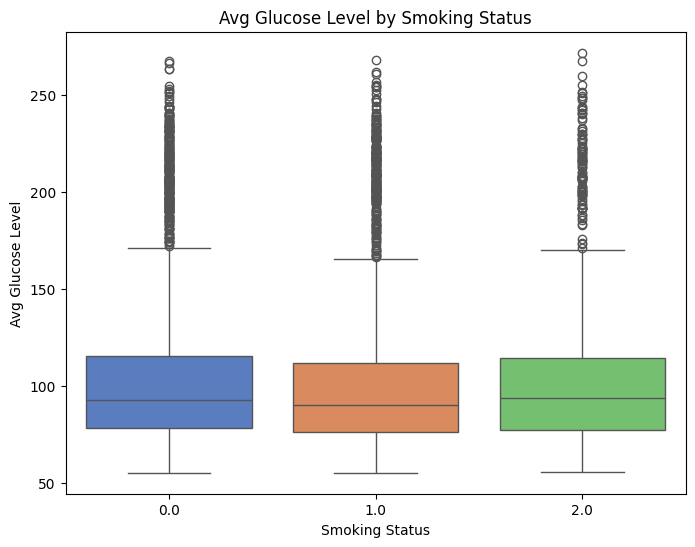

In [40]:
# Box plot: Avg Glucose Level by Smoking Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking_status', y='avg_glucose_level', data=df, palette='muted')
plt.title("Avg Glucose Level by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Avg Glucose Level")
plt.show()

In [41]:
# Step 5: Extracting interesting patterns and facts
# Male to female ratio
male_count = df[df['gender'] == 0].shape[0]
female_count = df[df['gender'] == 1].shape[0]
print(f"Male Count: {male_count}, Female Count: {female_count}")

Male Count: 2994, Female Count: 2115


In [42]:
# Impact of smoking status on glucose levels
smoking_groups = df.groupby('smoking_status')['avg_glucose_level'].mean()
print("Average Glucose Level by Smoking Status:")
print(smoking_groups)

Average Glucose Level by Smoking Status:
smoking_status
0.0    106.015235
1.0    105.523717
2.0    108.017440
Name: avg_glucose_level, dtype: float64
